In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import chi2

In [2]:
# Background points
min_, max_ = 0.,10
b = np.linspace(min_,max_,11)
s = 1

In [3]:
def GetLimit(n,b,s=1,CL=0.95):
    
    df = 2*(n+1)
    upper = (0.5*chi2.ppf(CL,df = df) - b )/s
    return upper

In [4]:
def GetMu(n):
    mu = np.zeros(len(b))
    
    for i in range(len(b)):
        mu[i] = GetLimit(n,b[i])
        
    return mu

In [5]:
Points = {}

for i in range(11):
    Points[i] = GetMu(i)

In [6]:
def SetStyle(ax,x,y,xlabel_,ylabel_,scale_=1., fontsize_=16):
    
    ticks_x = ticker.FuncFormatter(lambda x,pos:'{:.2f}'.format(x/scale_))
    ax.xaxis.set_major_formatter(ticks_x)

    ticks_y = ticker.FuncFormatter(lambda y,pos:'{:.2f}'.format(y/scale_))
    ax.yaxis.set_major_formatter(ticks_y)

    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.set_xlim(x[0],x[-1])
    #ax.set_ylim(np.min(y),np.max(y))
    ax.set_ylim(-7,20)
    
    ax.set_xlabel(r'$'+xlabel_+'$',fontsize=fontsize_)
    ax.xaxis.set_label_coords(0.96, -0.1)

    if ylabel_ == '':
        ax.set_ylabel('',fontsize=fontsize_)
    else:    
        ax.set_ylabel(r'$'+ylabel_+'$',fontsize=fontsize_)
            
    ax.yaxis.set_label_coords(-0.1, 0.96)

    ax.legend(loc=1,prop={'size': 10})  

In [7]:
def GetFigure(name_=''):
    
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(1,1,1)
    
   
    ax.axhline( y = 0, color='k', lw=3, linestyle='--', label='Unphysical Region' )
 
    ax.fill_between(b,-7,0,color='lightskyblue')
    
    for i in range(len(Points)):
        ax.plot(b,Points[i],marker='o',lw=1,label=r'$N_{o}: %.0f$'%(i))
        

    SetStyle(ax,b,b,xlabel_='N_{b}',ylabel_='\mu^{up}')
    
    folder = '../Figures/'
    folder += name_
    
    plt.savefig(folder)

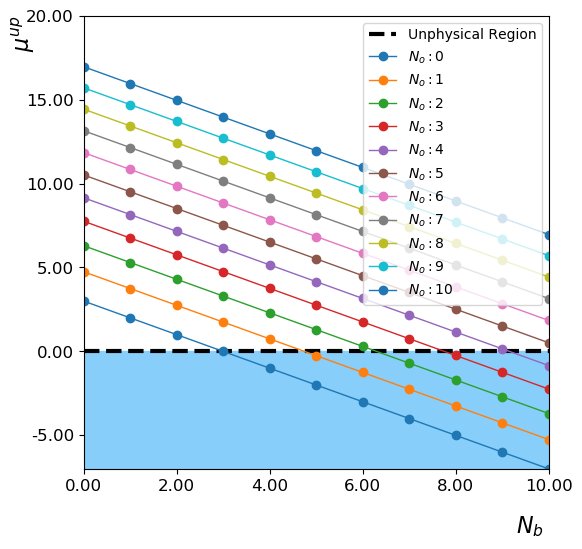

In [8]:
GetFigure(name_='Frequentist_Background.pdf')